<a href="https://colab.research.google.com/github/manasdhir/AI-algorithms/blob/main/AI%20algos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#bfs

In [1]:
def bfs(g,start,goal):
  visited={}
  for i in g:
    visited[i]=False
  q=[]
  if start==goal:
    return "Goal found"
  visited[start]=True
  q.append(start)
  while q:
    curr=q.pop(0)
    print(curr, end=" ")
    if curr==goal:
      return "\nGoal found"
    for j in g[curr]:
      if not visited[j]:
        visited[j]=True
        q.append(j)
  return "\ngoal not found"
g={1:[2,3],2:[4,5],3:[6,7],4:[],5:[],6:[],7:[]}
goal=7
print(bfs(g,1,7))

dfs

In [22]:
def dfs(visited, node, goal, graph):
    print(node)
    visited[node] = True

    if node == goal:
        return "Goal found"

    for neighbor in graph[node]:
        if not visited[neighbor]:
            result = dfs(visited, neighbor, goal, graph)
            if result == "Goal found":
                return result

    return "Goal not found"

In [25]:
g={1:[2,3],2:[4,5],3:[6,7],4:[],5:[],6:[],7:[]}
goal=7
visited={}
for i in g:
  visited[i]=False

In [27]:
dfs(visited,1,7,g)

1


'Goal not found'

#iterative deepening dfs

In [37]:
def dfs(visited, node, goal, graph,max_depth,traversed_values,curr_depth=0):
    if(curr_depth>max_depth):
      return "depth limit reached"

    traversed_values.append(node)
    visited[node] = True

    if node == goal:
        return "Goal found"

    for neighbor in graph[node]:
        if not visited[neighbor]:
            result = dfs(visited, neighbor, goal, graph,max_depth,traversed_values,curr_depth+1)
            if result == "Goal found":
                return result

    return "Goal not found"

In [38]:
def iddfs(g,start,goal):
  max_d=0
  while True:
      visited={}
      for i in g:
        visited[i]=False
      traversed_values=[]
      result=dfs(visited,start,goal,g,max_d,traversed_values)
      print(f"iteration{max_d}:{traversed_values}")
      if result=="Goal found":
        return result
      max_d+=1

In [41]:
g = {1: [2, 3], 2: [4, 5], 3: [6, 7], 4: [], 5: [], 6: [], 7: []}
goal = 7
iddfs(g, 1, goal)

iteration0:[1]
iteration1:[1, 2, 3]
iteration2:[1, 2, 4, 5, 3, 6, 7]


'Goal found'

A*

In [42]:
import heapq

graph = {
    'S': [('A', 1), ('B', 4)],
    'A': [('B', 2), ('C', 5), ('D', 12)],
    'B': [('C', 2)],
    'C': [('D', 3)],
    'D': [],
}

heuristics = {
    'S': 8,
    'A': 7,
    'B': 3,
    'C': 2,
    'D': 1
}

start_node = 'S'
goal_node = 'D'

def astar_search(graph, start, goal, heuristics):
    open_list = [(0, start)]
    visited = {node: False for node in graph}
    g_costs = {node: float('inf') for node in graph}
    g_costs[start] = 0
    parents = {}

    while open_list:
        _, current = heapq.heappop(open_list)
        if current == goal:
            path = [current]
            while current != start:
                current = parents[current]
                path.append(current)
            path.reverse()
            return path

        if not visited[current]:
            visited[current] = True
            for neighbor, cost in graph[current]:
                tentative_g_cost = g_costs[current] + cost

                if tentative_g_cost < g_costs[neighbor]:
                    g_costs[neighbor] = tentative_g_cost
                    f_cost = tentative_g_cost + heuristics[neighbor]
                    heapq.heappush(open_list, (f_cost, neighbor))
                    parents[neighbor] = current
    return None
print(astar_search(graph,start_node,goal_node,heuristics))

['S', 'A', 'B', 'C', 'D']


#minimax

In [46]:
def minimax(node, depth, is_maximizing_player):
    if node in terminal_nodes:
        return terminal_nodes[node]

    if is_maximizing_player:
        best_value = float('-inf')
        for child in tree[node]:
            value = minimax(child, depth + 1, False)
            best_value = max(best_value, value)
        return best_value
    else:
        best_value = float('inf')
        for child in tree[node]:
            value = minimax(child, depth + 1, True)
            best_value = min(best_value, value)
        return best_value

# Define a function to find the optimal path
def find_optimal_path(node, is_maximizing_player):
    optimal_value = minimax(node, 0, is_maximizing_player)
    path = [node]

    while node in tree:
        if is_maximizing_player:
            best_value = float('-inf')
            best_node = None
            for child in tree[node]:
                value = minimax(child, 0, not is_maximizing_player)
                if value > best_value:
                    best_value = value
                    best_node = child
        else:
            best_value = float('inf')
            best_node = None
            for child in tree[node]:
                value = minimax(child, 0, not is_maximizing_player)
                if value < best_value:
                    best_value = value
                    best_node = child
        path.append(best_node)
        node = best_node
        is_maximizing_player = not is_maximizing_player

    return optimal_value, path
terminal_nodes = {
    'H': -3,
    'I': 5,
    'J': 1,
    'K': 4,
    'L': -1,
    'M': -7,
    'N': 0,
    'O': 6
}


tree = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F', 'G'],
    'D': ['H', 'I'],
    'E': ['J', 'K'],
    'F': ['L', 'M'],
    'G': ['N', 'O']
}

optimal_value, optimal_path = find_optimal_path('A', True)

print(f"The optimal value is {optimal_value} and the optimal path is {' -> '.join(optimal_path)}")

The optimal value is 4 and the optimal path is A -> B -> E -> K


#depth limited search

In [48]:
def dfs_recursive(graph, node, visited, depth_limit, goal):
    if depth_limit == 0:
        return
    visited[node] = True
    print(node, end=' ')
    if node == goal:
        return "Goal found"
    for neighbor in graph[node]:
        if not visited[neighbor]:
            result = dfs_recursive(graph, neighbor, visited, depth_limit - 1, goal)
            if result == "Goal found":
                return "Goal found"

def depth_limited_search(graph, start_node, depth_limit, goal):
    visited = {node: False for node in graph}
    return dfs_recursive(graph, start_node, visited, depth_limit, goal)

graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': [],
    'F': []
}

start_node = 'A'
depth_limit = 2
goal = 'C'
result = depth_limited_search(graph, start_node, depth_limit, goal)
if result == "Goal found":
    print("\nGoal found")
else:
    print("\nGoal not found")

A B C 
Goal found


In [49]:
MAX = float('inf')
MIN = -float('inf')
def minimax(depth, nodeIndex, maximizingPlayer, values, alpha, beta):
    if depth == 3:
        return values[nodeIndex]

    if maximizingPlayer:
        best = MIN
        for i in range(2):
            val = minimax(depth + 1, nodeIndex * 2 + i, False, values, alpha, beta)
            best = max(best, val)
            alpha = max(alpha, best)
            if beta <= alpha:
                break
        return best

    else:
        best = MAX
        for i in range(2):
            val = minimax(depth + 1, nodeIndex * 2 + i, True, values, alpha, beta)
            best = min(best, val)
            beta = min(beta, best)
            if beta <= alpha:
                break
        return best
values = [3, 5, 6, 9, 1, 2, 0,-1]
print("The optimal value is:", minimax(0, 0, True, values, MIN, MAX))

The optimal value is: 5


#water jug problem

In [50]:
from collections import deque
def pour(state, jug1, jug2):
    amt = min(state[jug1], (jug_caps[jug2] - state[jug2]))
    new_state = list(state)
    new_state[jug1] -= amt
    new_state[jug2] += amt
    return tuple(new_state)
def get_successors(state):
    successors = []
    for jug1, jug2 in [(0, 1), (1, 0)]:
        new_state = pour(state, jug1, jug2)
        if new_state != state:
            successors.append(new_state)
    for jug in [0, 1]:
        new_state = list(state)
        new_state[jug] = jug_caps[jug]
        successors.append(tuple(new_state))
    for jug in [0, 1]:
        new_state = list(state)
        new_state[jug] = 0
        successors.append(tuple(new_state))

    return successors
def heuristic(state, goal):
    return sum(abs(state[i] - goal[i]) for i in range(len(state)))
def a_star(start, goal):
    open_list = [(heuristic(start, goal), 0, start)]  # (f, g, state)
    closed_list = set()
    parent = {start: None}
    while open_list:
        _, g, curr_state = open_list.pop(0)
        if curr_state == goal:
            path = deque()
            state = curr_state
            while state is not None:
                path.appendleft(state)
                state = parent[state]
            return list(path)
        closed_list.add(curr_state)
        for succ_state in get_successors(curr_state):
            succ_g = g + 1  # Assuming the cost of each step is 1
            if succ_state not in closed_list:
                succ_cost = succ_g + heuristic(succ_state, goal)
                open_list.append((succ_cost, succ_g, succ_state))
                open_list.sort()
                parent[succ_state] = curr_state
    return None
jug_caps = (4, 3)
start_state = (0, 0)
goal_state = (2, 0)
solution = a_star(start_state, goal_state)
if solution:
    print("Solution:")
    for state in solution:
        print(state)
else:
    print("No solution exists.")

Solution:
(0, 0)
(0, 3)
(3, 0)
(3, 3)
(4, 2)
(0, 2)
(2, 0)


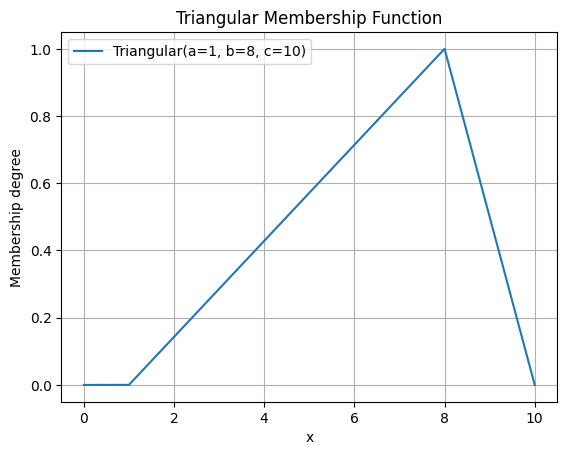

In [51]:
import numpy as np
import matplotlib.pyplot as plt
def triangular(x, a, b, c):
    return np.maximum(np.minimum((x-a)/(b-a), (c-x)/(c-b)), 0)
x = np.linspace(0, 10, 1000)
a, b, c = 1, 8, 10
y = triangular(x, a, b, c)
plt.plot(x, y, label=f'Triangular(a={a}, b={b}, c={c})')
plt.xlabel('x')
plt.ylabel('Membership degree')
plt.title('Triangular Membership Function')
plt.legend()
plt.grid(True)
plt.show()

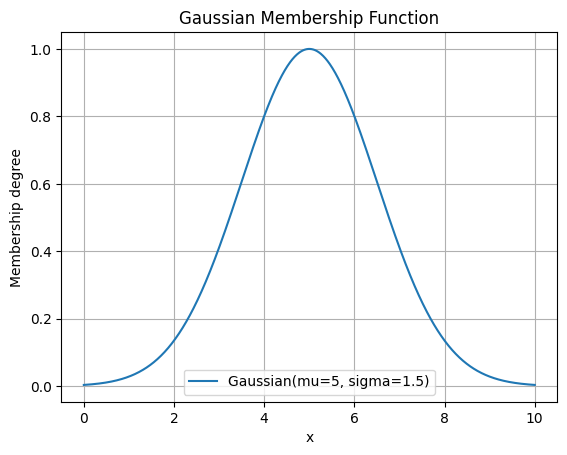

In [52]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x, mu, sigma):
    return np.exp(-0.5 * ((x - mu) / sigma) ** 2)

x = np.linspace(0, 10, 1000)
mu, sigma = 5, 1.5
y = gaussian(x, mu, sigma)

plt.plot(x, y, label=f'Gaussian(mu={mu}, sigma={sigma})')
plt.xlabel('x')
plt.ylabel('Membership degree')
plt.title('Gaussian Membership Function')
plt.legend()
plt.grid(True)
plt.show()

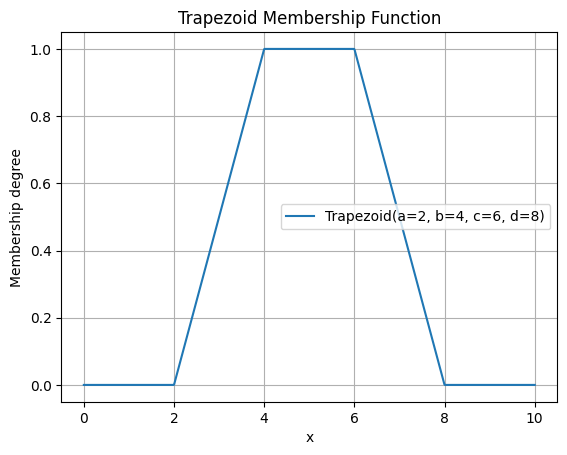

In [53]:
import numpy as np
import matplotlib.pyplot as plt
def trapezoid(x, a, b, c, d):
           return np.maximum(np.minimum(np.minimum((x-a)/(b-a),1),(d-x)/(d-c)), 0)
x = np.linspace(0, 10, 1000)
a, b, c, d = 2, 4, 6, 8
y = trapezoid(x, a, b, c, d)
plt.plot(x, y, label=f'Trapezoid(a={a}, b={b}, c={c}, d={d})')
plt.xlabel('x')
plt.ylabel('Membership degree')
plt.title('Trapezoid Membership Function')
plt.legend()
plt.grid(True)
plt.show()